In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, PrecisionRecallDisplay, classification_report, roc_curve, RocCurveDisplay
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import LinearSVC
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


import warnings
warnings.filterwarnings('ignore')

KeyboardInterrupt: 

Получите базовое решение:

Удалите все пропущенные значения

Удалите все категориальные переменные

Обучите модель

Выберете и посчитайте метрику качества
/

Проведите первичный анализ данных

Проведите визуальный анализ данных

Разбейте данные на обучение и тест

Сделайте предобработку данных с помощью класса и пайплайна

Обучите модель классификации с целевым признаком RainTomorrow


Оцените подходящие метрики качества

Сформулируйте выводы по проделанной работе


In [ ]:
!wget https://drive.google.com/uc?id=1wcgWKb1b6YD_lkj1xcxgc2WDs7S55Yzp -O Rain

--2024-06-16 12:56:47--  https://drive.google.com/uc?id=1wcgWKb1b6YD_lkj1xcxgc2WDs7S55Yzp
Resolving drive.google.com (drive.google.com)... 173.194.216.102, 173.194.216.113, 173.194.216.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.216.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1wcgWKb1b6YD_lkj1xcxgc2WDs7S55Yzp [following]
--2024-06-16 12:56:47--  https://drive.usercontent.google.com/download?id=1wcgWKb1b6YD_lkj1xcxgc2WDs7S55Yzp
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.212.132, 2607:f8b0:400c:c11::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.212.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14094055 (13M) [application/octet-stream]
Saving to: ‘Rain’

Rain                100%[===================>]  13.44M  52.6MB/s    in 0.3s    

2024-06-16 12:56:50 (52.6 MB/s) - ‘

In [ ]:
data = pd.read_csv('Rain')

In [ ]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
data_train = data.copy()

In [ ]:
data_train.dropna(inplace=True)
data_train

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


In [ ]:
data_train['RainTomorrow'] = data_train['RainTomorrow'].replace({'Yes': 1, 'No': 2})
data_train['RainTomorrow']

6049      2
6050      2
6052      2
6053      2
6054      2
         ..
142298    2
142299    2
142300    2
142301    2
142302    2
Name: RainTomorrow, Length: 56420, dtype: int64

In [ ]:
for col in data_train:
  if data_train[col].dtype == object:
    data_train.drop(col, axis=1, inplace=True)
data_train


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,2
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,2
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,2
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,2
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,2
142299,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,2
142300,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,2
142301,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,2


In [ ]:
x1 = data_train.drop('RainTomorrow', axis=1)
y1 = data_train['RainTomorrow']
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=42)

In [ ]:
model_train = LogisticRegression()

model_train.fit(x1_train, y1_train)

LogisticRegression()

In [ ]:
print(classification_report(model_train.predict(x1_test), y1_test))

              precision    recall  f1-score   support

           1       0.53      0.74      0.62      2685
           2       0.95      0.87      0.91     14241

    accuracy                           0.85     16926
   macro avg       0.74      0.81      0.76     16926
weighted avg       0.88      0.85      0.86     16926





---

Первичный анализ данных

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
data.describe(include="object")

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [ ]:
data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
data['RainTomorrow'].value_counts()


RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

Анализ показал

1. В каждой колонке имеются пропуски, в некоторых даже слишком много

2. Имеются аномалии

3. 16 вещестенных и 7 категориальных

4. В некоторых колонках много классов

5. Классы в тагрете несбалансированны

- Мысли

Посмотреть, в каких городах чаще всего идет дождь

Колонку с солнечным светом и испраением -  убрать

****
Визуальный анализ данных


In [ ]:
data['RainTomorrow'] = data['RainTomorrow'].replace({'Yes': 1, 'No': 0})
data['RainTomorrow']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    NaN
Name: RainTomorrow, Length: 145460, dtype: float64

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,0.0,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,0.0,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,0.0,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,0.0,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,0.0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,1020.3,NaN,NaN,10.1,22.4,No,0.0,2017,6,21
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,1019.1,NaN,NaN,10.9,24.5,No,0.0,2017,6,22
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,1016.8,NaN,NaN,12.5,26.1,No,0.0,2017,6,23
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,1016.5,3.0,2.0,15.1,26.0,No,0.0,2017,6,24


In [ ]:
num_cols = data.select_dtypes(include='float')
num_cols

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0.0
145456,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0
145457,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0
145458,7.8,27.0,0.0,NaN,NaN,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0.0


In [ ]:
cat_cols = data.select_dtypes(include='object')
cat_cols

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,Albury,W,W,WNW,No
1,Albury,WNW,NNW,WSW,No
2,Albury,WSW,W,WSW,No
3,Albury,NE,SE,E,No
4,Albury,W,ENE,NW,No
...,...,...,...,...,...
145455,Uluru,E,SE,ENE,No
145456,Uluru,NNW,SE,N,No
145457,Uluru,N,SE,WNW,No
145458,Uluru,SE,SSE,N,No


<Axes: >

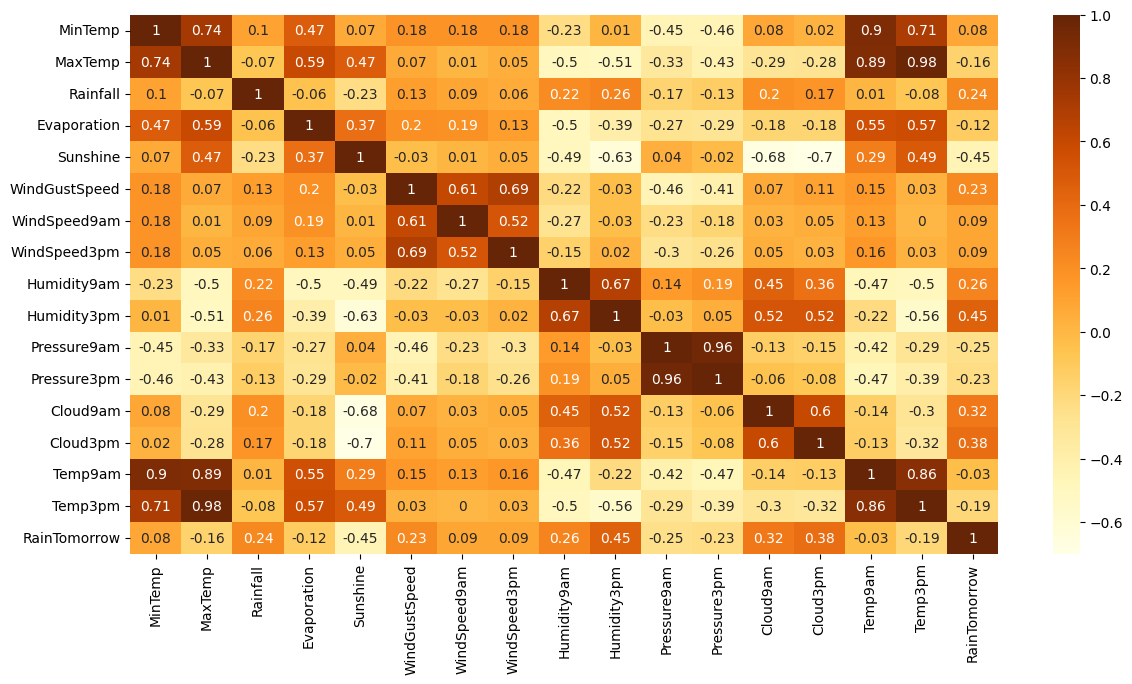

In [ ]:
correlation = num_cols.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

ЕСть сильно кореллирующие признаки между собой, но с таргетом не кореллируют

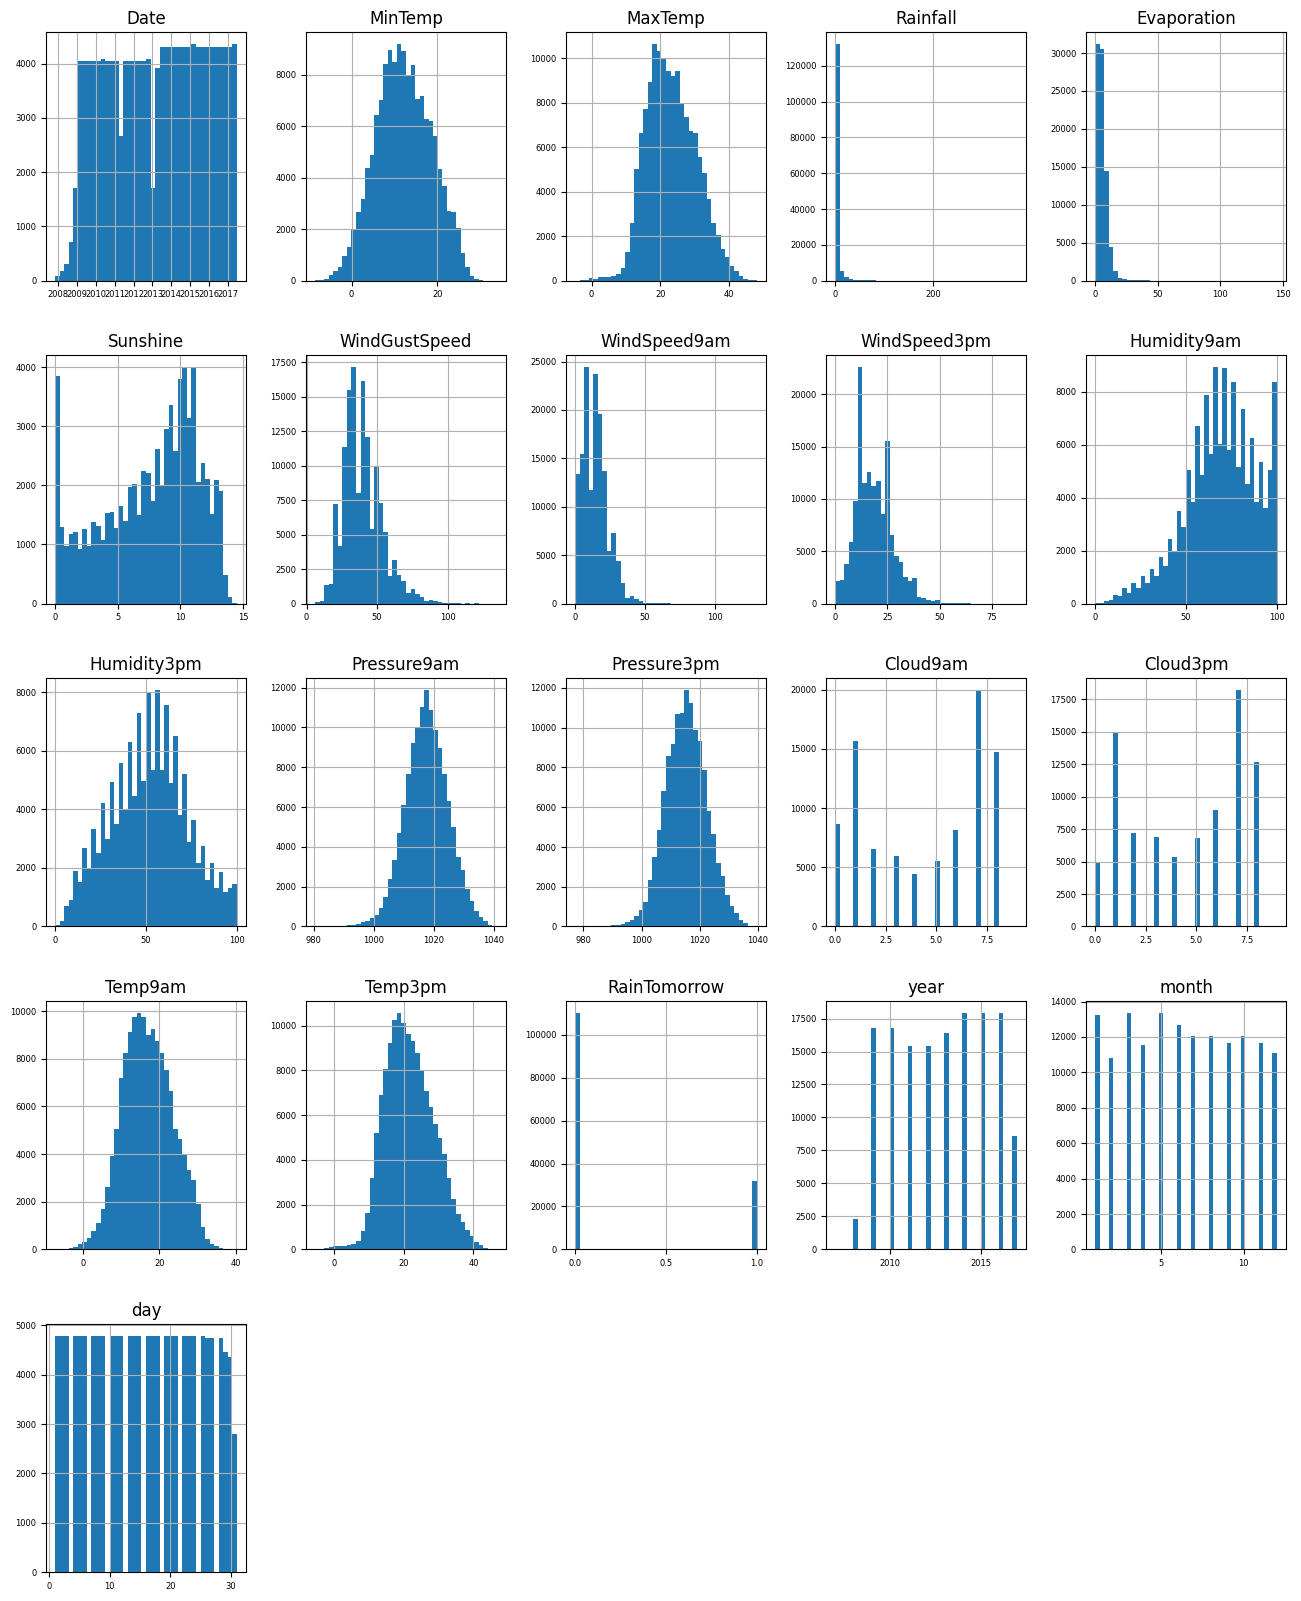

In [ ]:
data.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6);
plt.show()

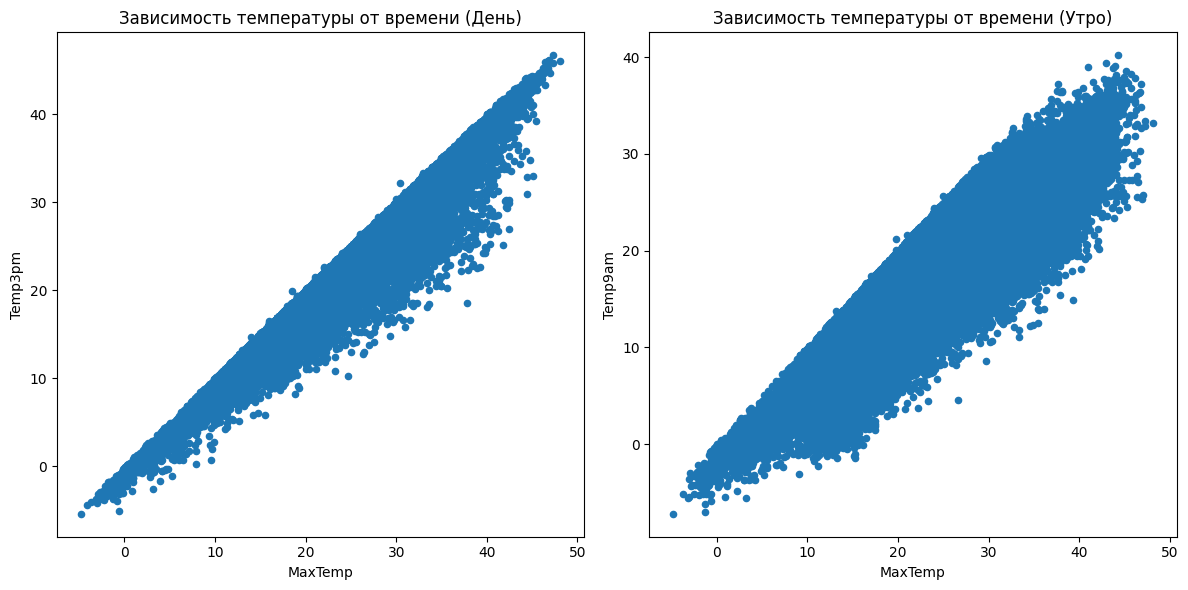

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

data.plot(x="MaxTemp", y="Temp3pm", kind='scatter', ax=axs[0])
axs[0].set_title('Зависимость температуры от времени (День)')

data.plot(x="MaxTemp", y="Temp9am", kind='scatter', ax=axs[1])
axs[1].set_title('Зависимость температуры от времени (Утро)')

plt.tight_layout()
plt.show()


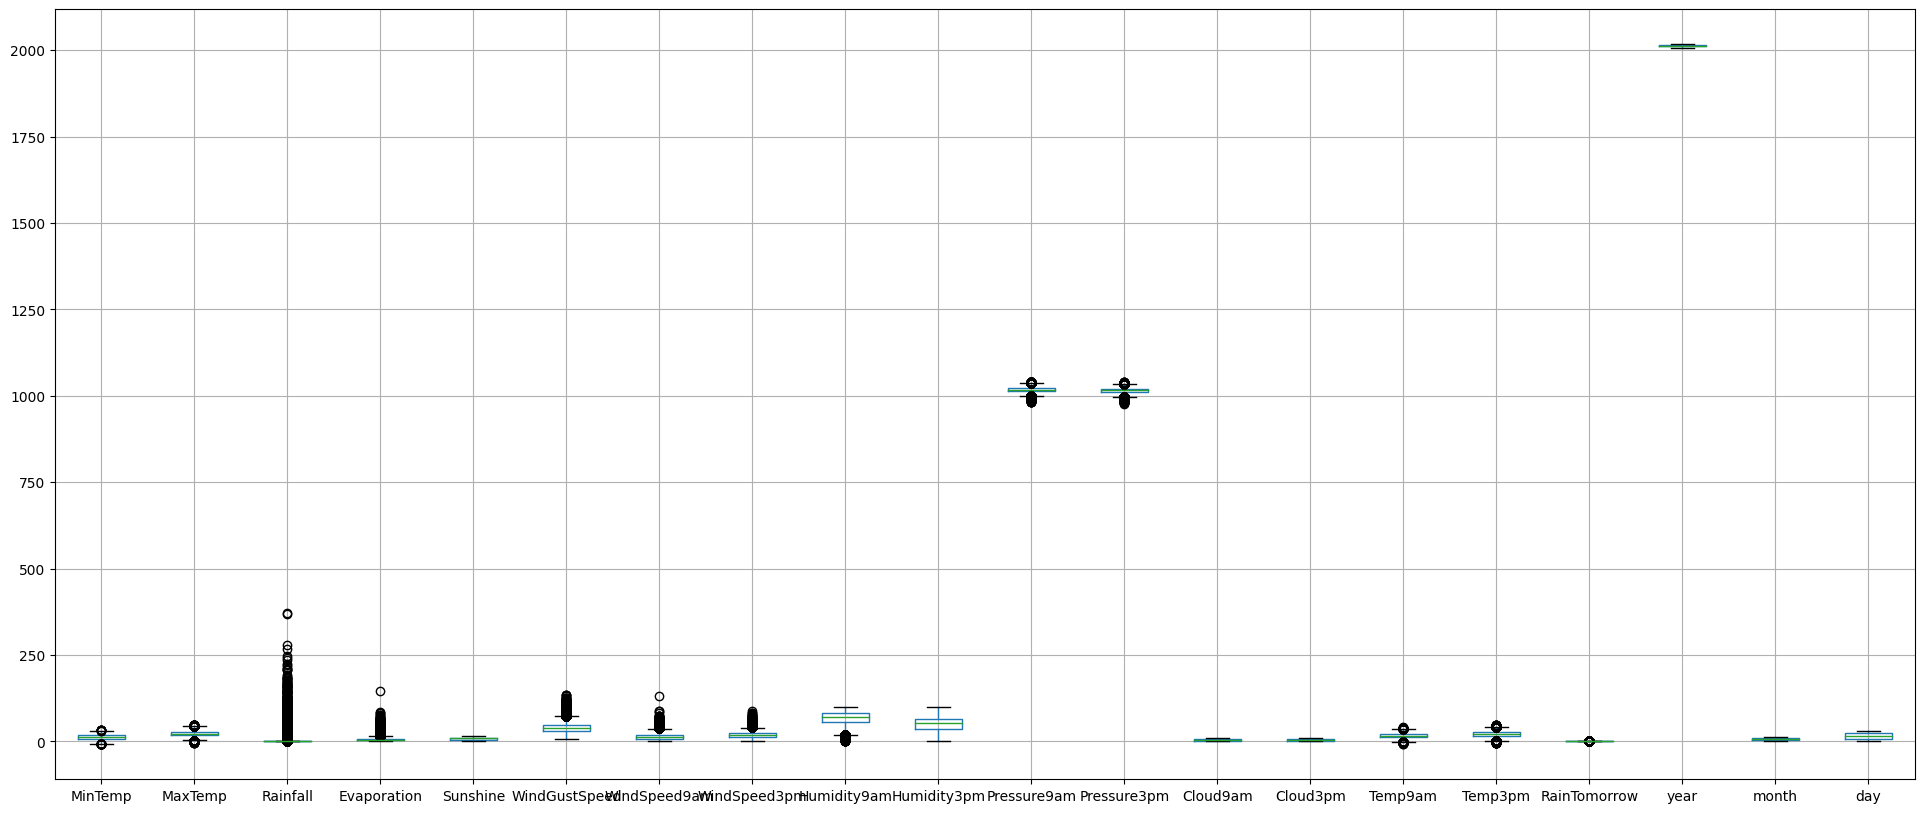

In [ ]:
data.boxplot(figsize=(24,10))
plt.show()


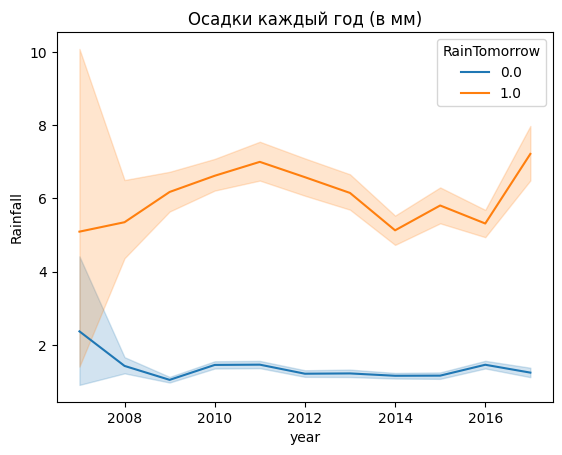

In [ ]:
sns.lineplot(x = data['year'], y = data['Rainfall'], hue=data['RainTomorrow'])
plt.title('Осадки каждый год (в мм)')
plt.show()

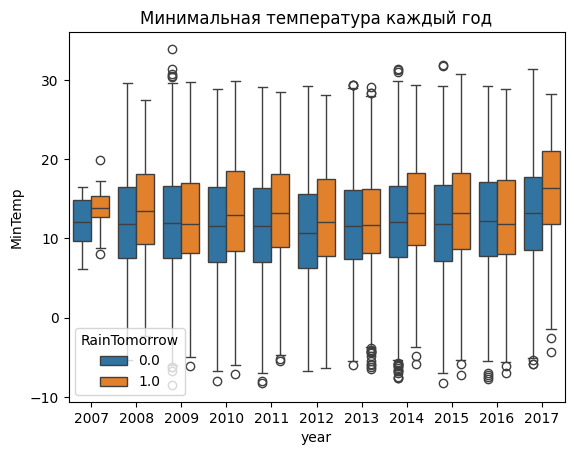

In [ ]:
sns.boxplot(x = data['year'], y = data['MinTemp'], hue=data['RainTomorrow'])
plt.title('Минимальная температура каждый год')
plt.show()

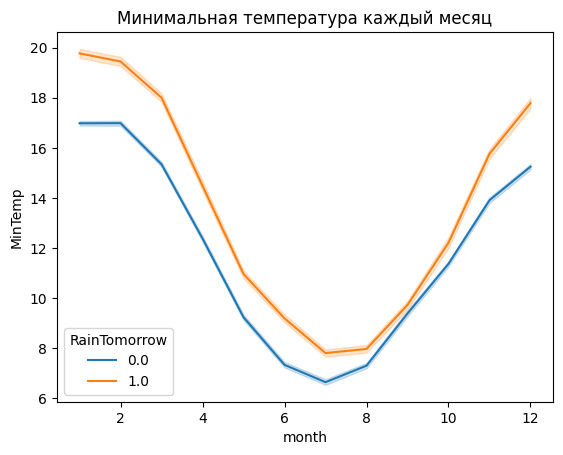

In [ ]:
sns.lineplot(x = data['month'], y = data['MinTemp'],  hue=data['RainTomorrow'])
plt.title('Минимальная температура каждый месяц')
plt.show()

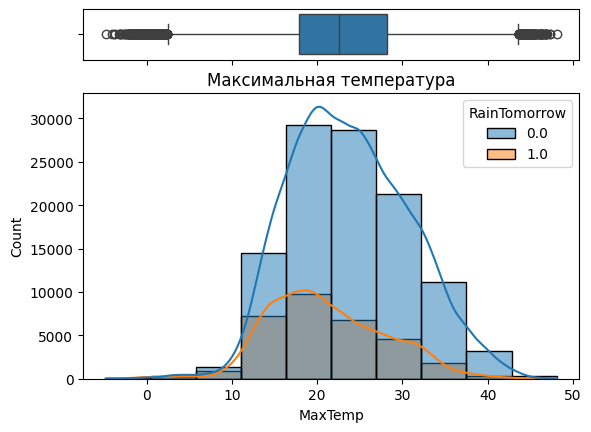

In [ ]:
fig, (ax_box, ax_hist) = plt.subplots(2,
                                    sharex = True,
                                    gridspec_kw = {'height_ratios': (.15, .85)})

sns.boxplot(x = data['MaxTemp'], ax = ax_box)
sns.histplot(x = data['MaxTemp'], hue=data['RainTomorrow'], ax = ax_hist, bins = 10, kde = True)

plt.title('Максимальная температура')

plt.show()

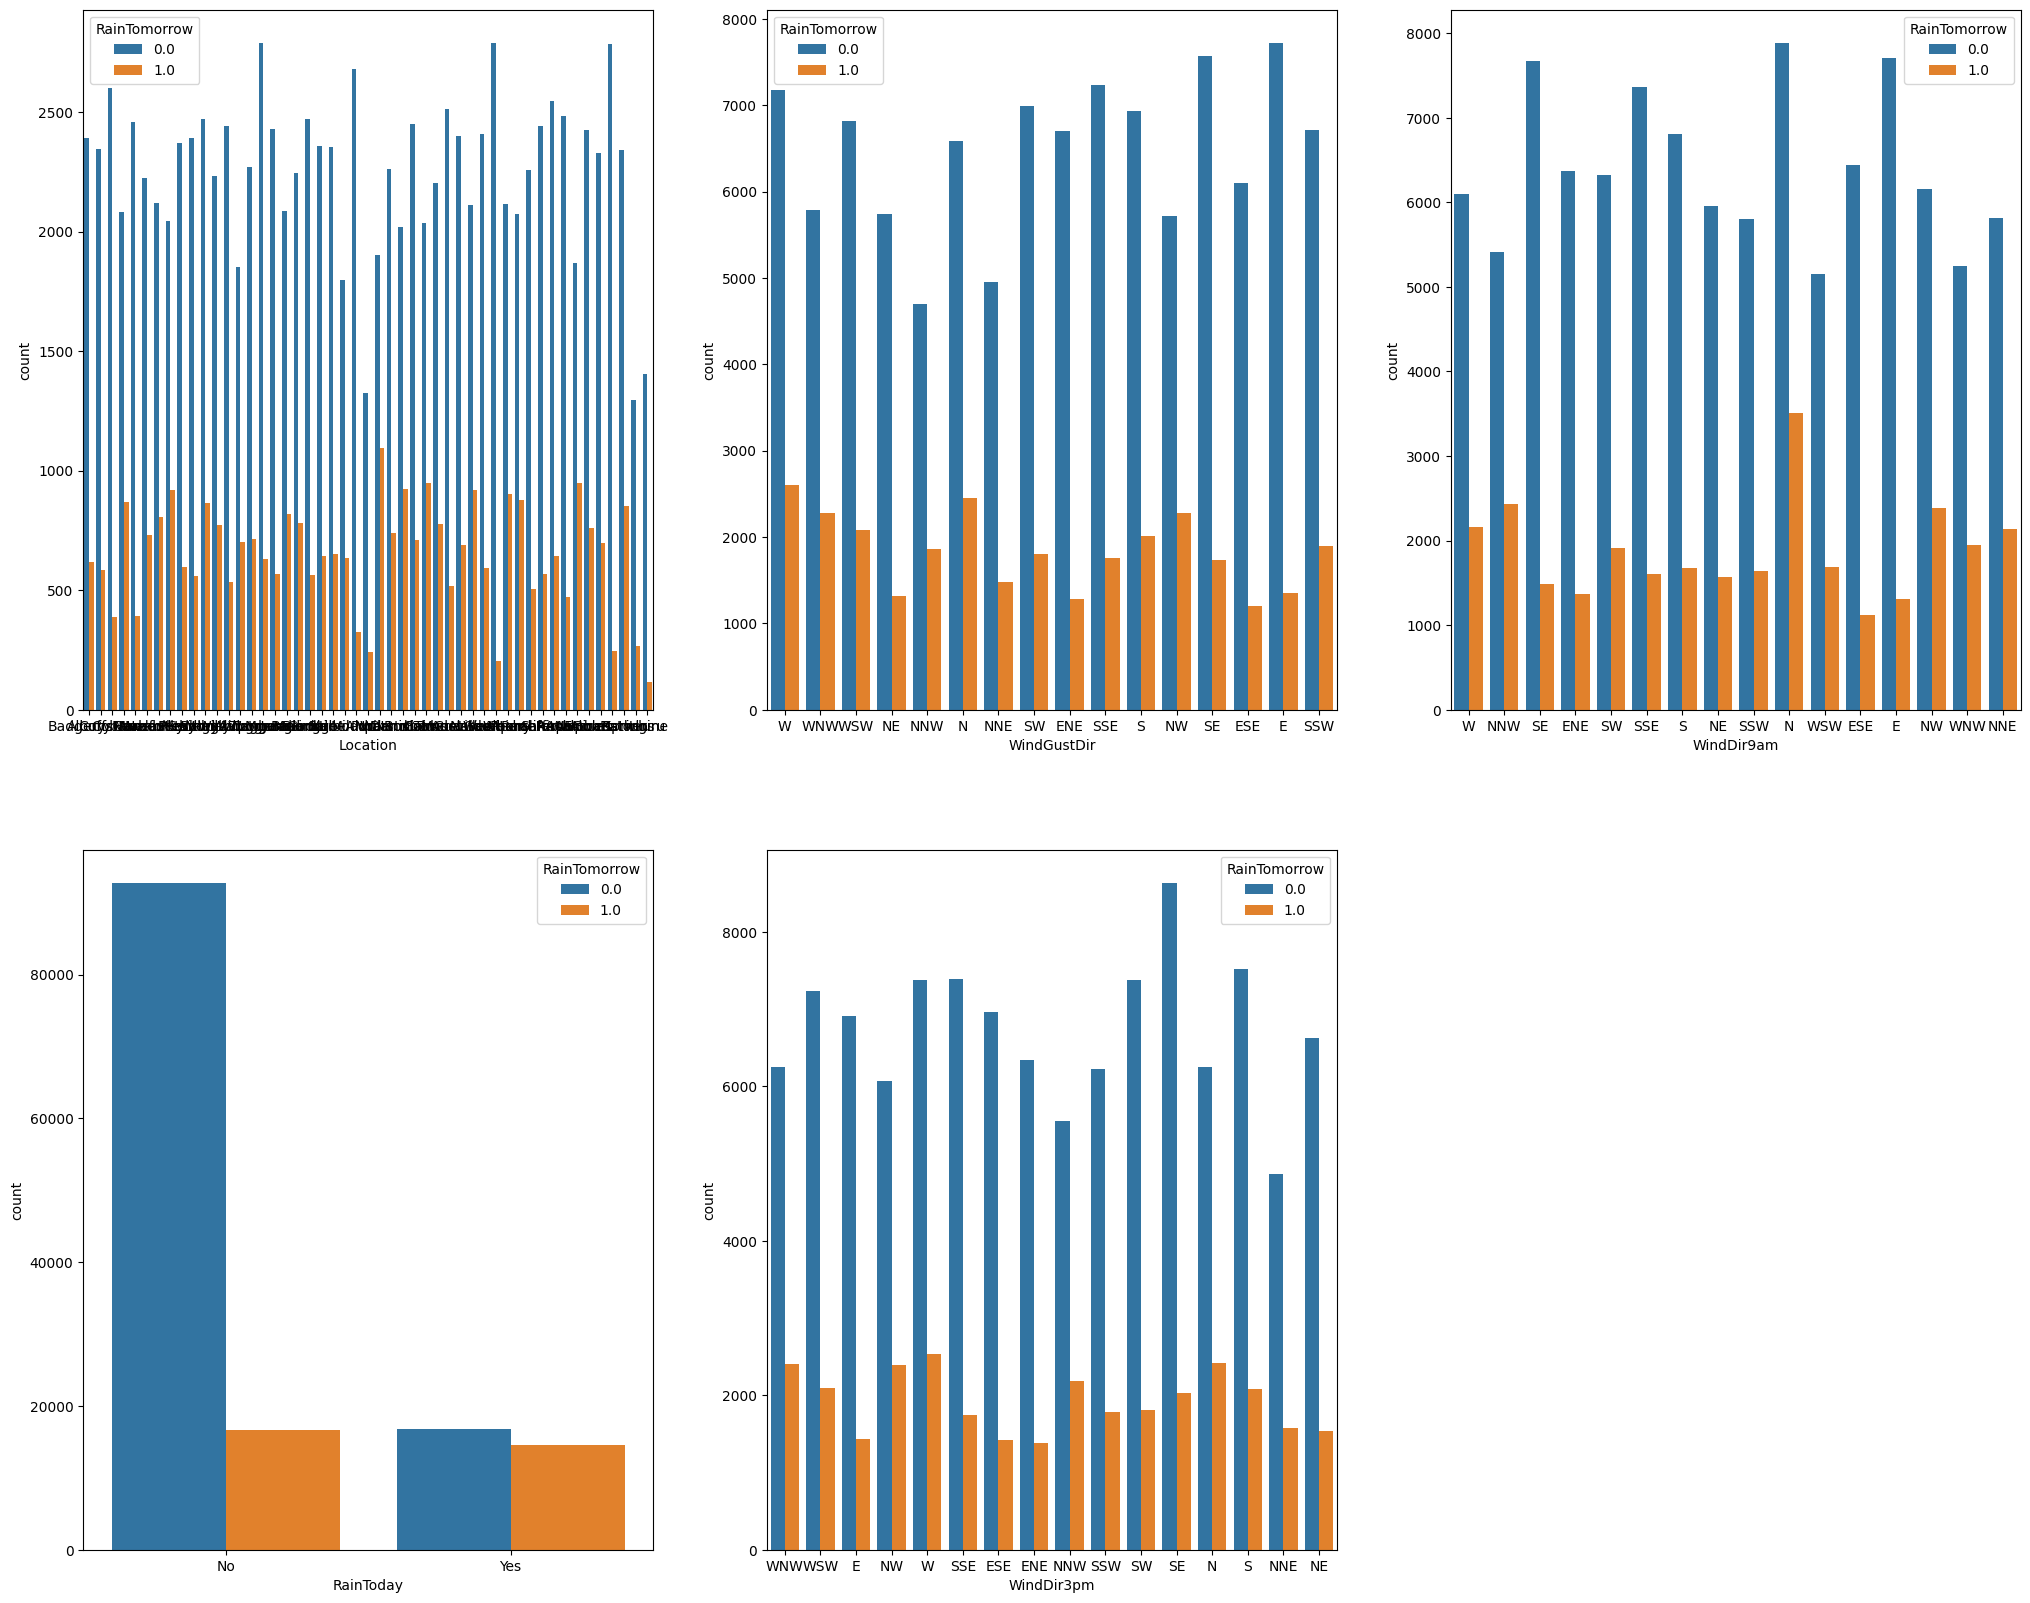

In [ ]:
plt.figure(figsize = (25,20))

plt.subplot(2, 3, 1)
sns.countplot(x=data['Location'],  hue = data['RainTomorrow'])

plt.subplot(2, 3, 2)
sns.countplot(x=data['WindGustDir'],  hue = data['RainTomorrow'])

plt.subplot(2, 3, 3)
sns.countplot(x=data['WindDir9am'],  hue = data['RainTomorrow'])

plt.subplot(2, 3, 4)
sns.countplot(x=data['RainToday'],  hue = data['RainTomorrow'])

plt.subplot(2, 3, 5)
sns.countplot(x=data['WindDir3pm'],  hue = data['RainTomorrow']);



Анализ показал

Нет особых обстоятельств, которые бы указывали нам на возможные осадки. Однако, на некоторых граффиках мы можем увидеть:

1. В некоторых городах дождь идет гораздо меньше, в некоторых - наоборот

2. Температура должна быть выше, чем обычно, чтобы был дождь

2. Так же, направление ветра может сыграть хоть какую-то роль

3. Боксплоты хорошо показали наличие аномалий в нашем датасете.




****
Делим данные, не забываем про соотношение классов

В таргете пропуски заменяем на самое частое значение класса по локации (все пропуски заполнились нулевым классом)

In [ ]:
modaRain = data['RainTomorrow'].mode()[0]
data['RainTomorrow'].fillna(data.groupby('Location')['RainTomorrow'].transform(lambda x: x.fillna(modaRain)), inplace=True)

In [ ]:
data['RainTomorrow'].value_counts()

RainTomorrow
0.0    113583
1.0     31877
Name: count, dtype: int64

In [ ]:
x = data.drop(['RainTomorrow', 'day', 'month', 'year', 'Date'], axis=1)
y = data['RainTomorrow']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

x_train.shape, x_test.shape

((101822, 21), (43638, 21))

****
Feature engineering

In [ ]:
for col in cat_cols:
  print(data[col].mode()[0])

Canberra
W
N
SE
No


In [ ]:
num_cols.drop('RainTomorrow', axis=1, inplace=True)


После обработки через правило трех сигм -  выбросы остались, поэтому брабатывать аномалии будем через квантили

In [ ]:
def transform(x_train, x_test, num_cols):

    train_data_copy = x_train.copy()
    test_data_copy = x_test.copy()

    for col in num_cols:
        quantile_85 = x_train[col].quantile(0.85)
        quantile_15 = x_train[col].quantile(0.15)

        train_data_copy.loc[train_data_copy[col] > quantile_85, col] = quantile_85
        train_data_copy.loc[train_data_copy[col] < quantile_15, col] = quantile_15

        test_data_copy.loc[test_data_copy[col] > quantile_85, col] = quantile_85
        test_data_copy.loc[test_data_copy[col] < quantile_15, col] = quantile_15

    return train_data_copy, test_data_copy


In [ ]:
x_train, x_test = transform(x_train, x_test, num_cols)


In [ ]:
'''
from sklearn.base import BaseEstimator, TransformerMixin

class DataPipeline(BaseEstimator, TransformerMixin):

    def __init__(self):
        self.moda = {}
        self.left = {}
        self.right = {}

    def fit(self, data, y=None):

      for col in num_cols:
          s = data[col].std()
          self.left[col] = -3 * s + data[col].mean()
          self.right[col] = 3 * s + data[col].mean()

      for col in cat_cols:

        self.moda = data[col].mode()[0]

      return self

    def transform(self, data, y=None):

      for col in num_cols:
          data.loc[data[col] > self.right[col], col] = self.right[col]
          data.loc[data[col] < self.left[col], col] = self.left[col]


      return data

'''

'\nfrom sklearn.base import BaseEstimator, TransformerMixin\n\nclass DataPipeline(BaseEstimator, TransformerMixin):\n\n    def __init__(self):\n        self.moda = {}\n        self.left = {}\n        self.right = {}\n\n    def fit(self, data, y=None):\n\n      for col in num_cols:\n          s = data[col].std()\n          self.left[col] = -3 * s + data[col].mean()\n          self.right[col] = 3 * s + data[col].mean()\n\n      for col in cat_cols:\n\n        self.moda = data[col].mode()[0]\n\n      return self\n\n    def transform(self, data, y=None):\n\n      for col in num_cols:\n          data.loc[data[col] > self.right[col], col] = self.right[col]\n          data.loc[data[col] < self.left[col], col] = self.left[col]\n\n\n      return data\n\n'

In [ ]:
'''
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    DataPipeline()
)

x_train_clean = pipe.fit_transform(x_train)
'''

'\nfrom sklearn.pipeline import make_pipeline\n\npipe = make_pipeline(\n    DataPipeline()\n)\n\nx_train_clean = pipe.fit_transform(x_train)\n'

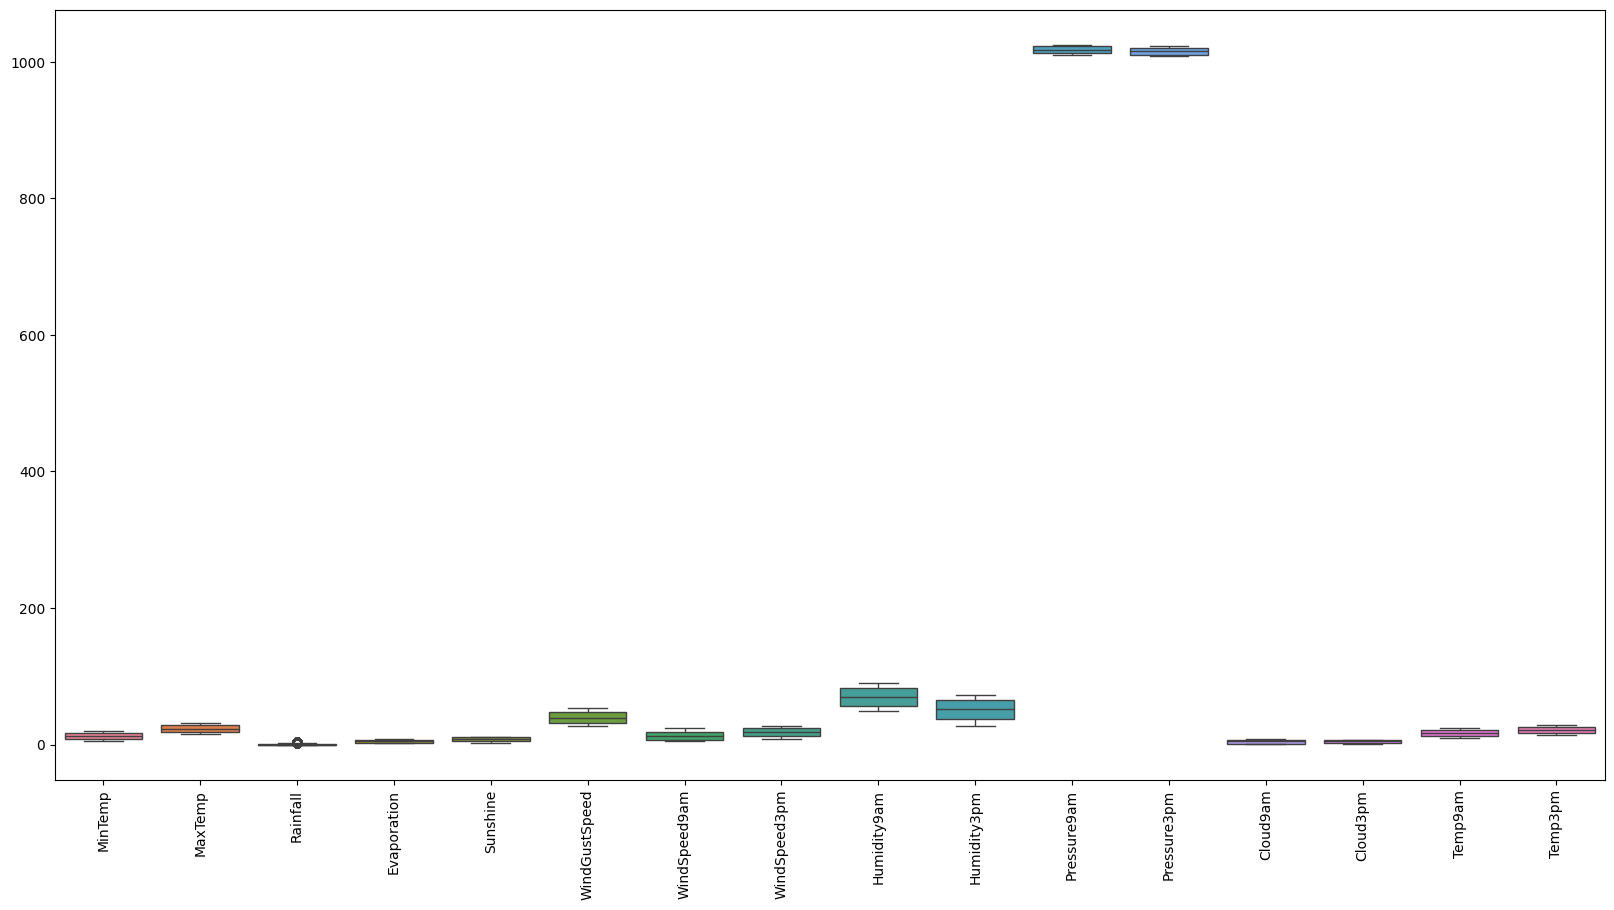

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=x_train)
plt.xticks(rotation=90)
plt.show()

****
Обработка пропусков

In [ ]:
data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow         0
year                 0
month                0
day                  0
dtype: int64

Обрабатывать будем следующим образом:

К категориальным колонкам применим моду

К вещественным колонкам применим медианное значение

In [ ]:
cat_transform = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

num_transform = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)


new_x = ColumnTransformer([
    ('cat', cat_transform, cat_cols_idx),
    ('num', num_transform, num_cols_idx)
])

pipe = make_pipeline(
    new_x
)

X_train = pipe.fit_transform(x_train)
X_test = pipe.transform(x_test)

In [ ]:
X_train = pd.DataFrame(X_train.toarray())
X_test = pd.DataFrame(X_test.toarray())

X_train

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.128220,-0.188484,1.425420,1.073127,-0.381424,0.071065,1.512847,1.223500,-0.189084,-0.730093
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.440141,0.573018,-1.423981,-1.485256,-0.320055,-0.500347,-1.714159,-1.912606,1.148007,1.500540
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.063983,-0.493085,-1.423981,-1.485256,-1.486068,-1.479910,0.129845,0.178131,0.438943,0.261299
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.219943,-1.406887,0.143189,-0.717742,1.500561,1.499594,0.129845,0.178131,-0.553745,0.490082
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.440141,-0.493085,1.282950,-0.973580,1.173259,1.275111,-1.253158,-1.389922,-1.364103,-1.340181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.440141,-0.493085,-1.352746,-1.229418,-1.486068,-1.479910,0.129845,0.178131,-0.310638,-0.691963
101818,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.219943,-1.406887,1.354185,0.305612,1.439192,1.315926,1.512847,0.700815,-1.364103,-0.901680
101819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.752062,-0.493085,0.214424,-1.101499,-0.013210,-0.010566,0.129845,0.178131,-1.019701,-0.501310
101820,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-1.063983,0.877619,-1.067806,-1.485256,-0.442793,-0.214641,0.590845,-0.867237,0.256613,1.348018


****
Строим модель

**Logistic Regression**

Test
              precision    recall  f1-score   support

         0.0      0.943     0.867     0.903     37069
         1.0      0.484     0.705     0.574      6569

    accuracy                          0.843     43638
   macro avg      0.714     0.786     0.739     43638
weighted avg      0.874     0.843     0.854     43638



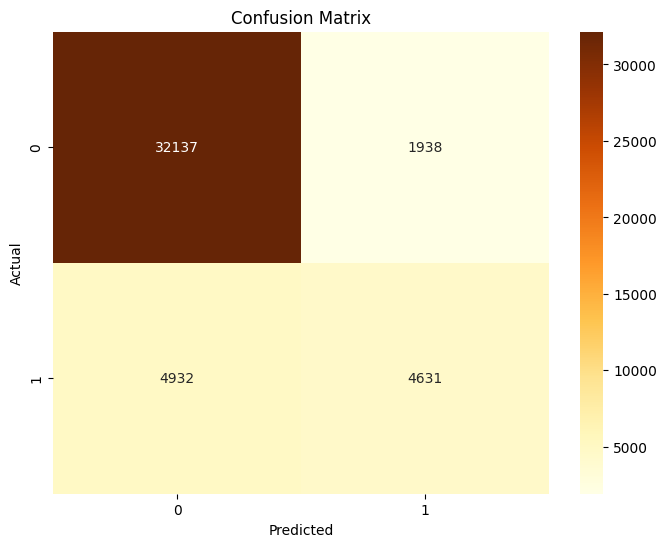

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_pred_train = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)

print('Test')
print(classification_report(y_pred_test, y_test, digits=3))

predictions = model_lr.predict(X_test)

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**GridSearchCV**

Test
              precision    recall  f1-score   support

         0.0      0.781     0.925     0.847     28768
         1.0      0.776     0.499     0.607     14870

    accuracy                          0.780     43638
   macro avg      0.779     0.712     0.727     43638
weighted avg      0.779     0.780     0.766     43638

Best Params: {'C': 0.01, 'penalty': 'l2'}


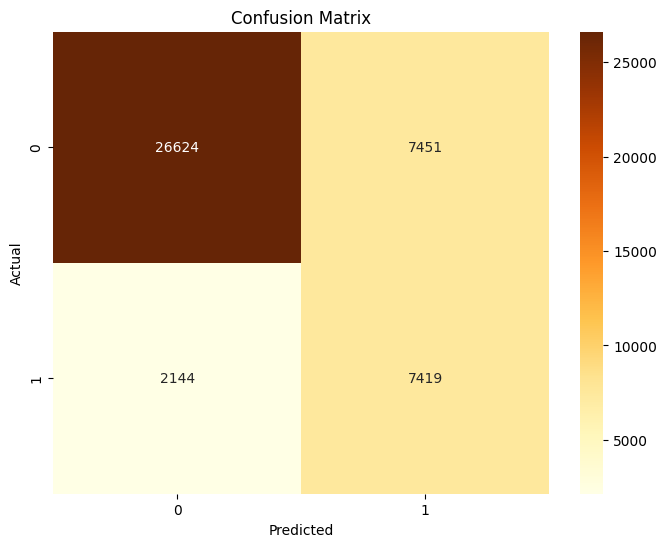

In [ ]:

param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
              'C': [1e-5, 0.0001, 0.001, 0.01]}

grid = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=5)
grid.fit(X_train, y_train)

print('Test')
print(classification_report(grid.predict(X_test), y_test, digits=3))

print('Best Params:', grid.best_params_)


predictions = grid.predict(X_test)

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



**SVM**

Test
              precision    recall  f1-score   support

         0.0      0.782     0.925     0.847     28795
         1.0      0.775     0.499     0.607     14843

    accuracy                          0.780     43638
   macro avg      0.778     0.712     0.727     43638
weighted avg      0.779     0.780     0.766     43638



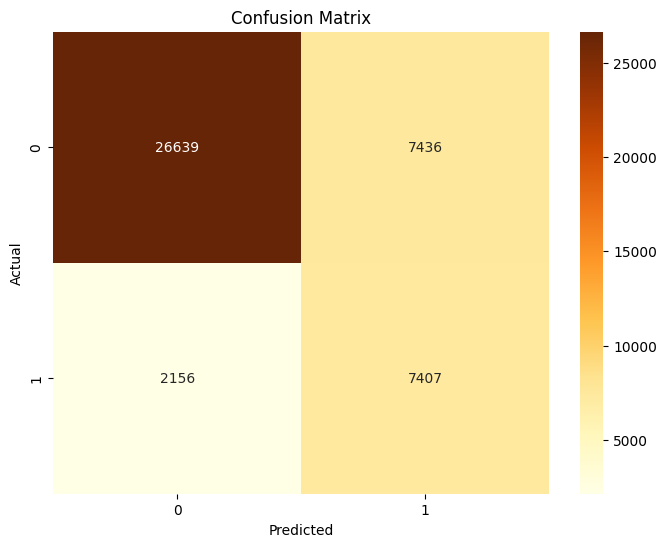

In [ ]:

pipe_svm =  LinearSVC(class_weight='balanced')

pipe_svm.fit(X_train, y_train)

print('Test')
print(classification_report(pipe_svm.predict(X_test), y_test, digits=3))


predictions = pipe_svm.predict(X_test)

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



**SMOTE**

Counter({1.0: 79508, 0.0: 79508})
Test
              precision    recall  f1-score   support

         0.0      0.785     0.925     0.849     28922
         1.0      0.772     0.502     0.608     14716

    accuracy                          0.782     43638
   macro avg      0.778     0.713     0.729     43638
weighted avg      0.781     0.782     0.768     43638



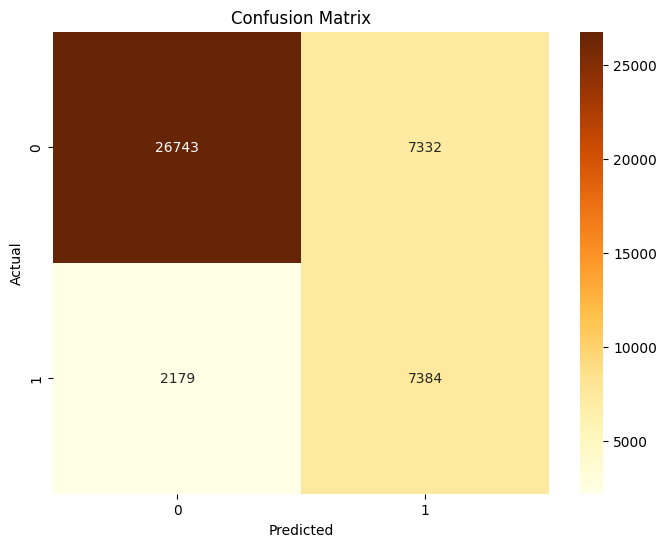

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter


os = SMOTE()
X_train, y_train = os.fit_resample(X_train, y_train)
count = Counter(y_train)
print(count)

model_smote = LogisticRegression(max_iter=500)
model_smote.fit(X_train, y_train)
predicted=model_smote.predict(X_test)

print('Test')
print(classification_report(predicted, y_test, digits=3))

predictions = model_smote.predict(X_test)

cm = confusion_matrix(y_test, predicted)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

****
Выводы по проделанной работе
****

Лучше всего себя показала обычная Лог. Регрессия.

GridSearchCV / SVM / Лог. Регрессия совместно со SMOTE - показали результат accuracy ниже. Однако, почти у всех этих моделей - идентичные результаты на метриках.

По улучшению модели ❕

1. Можно добавить кросс-валидацию

2. Можно обработать пропуски в таргете более тщательно (при моей обработке они все просто заменились 0 классом)

3. Попробовать заменить пропуски и аномалии через методы машинного обучения
